In [3]:
import torch
import sys

sys.path.append('..')

import SourceCode

In [4]:
from math import pi, e
import matplotlib.pyplot as plt
from SourceCode.EquationAndDomain import OnePointInitialCondition, \
                                         OneDimensionalMainEquation, \
                                         OneDimensionalSimpleDomain
from SourceCode.TrainerForNNEquationSolver import TrainerForNNEquationSolver
from SourceCode.utilities import nth_derivative
from SourceCode.ReportMaker import ReportMaker

# Example №1
$$ u_{tt} + 0.2u_t + u = -0.2 exp(-t/5) cos(t) $$
$$ u(0)=0 $$
$$ u(1)= sin(1)*exp(-0.2) $$
$$ t \in [0,1] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [9]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda x, nn_model_value: nth_derivative(nn_model_value, x, 2)
    + 0.2 * nth_derivative(nn_model_value, x, 1)
    + nn_model_value
    + 0.2 * torch.exp(-x / 5) * torch.cos(x)
)
n_points = 200
main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.sin(
    torch.Tensor([1])
) * torch.exp(torch.Tensor([-0.2]))
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 4.291534423828125e-06
Valid max absolute error: 4.291534423828125e-06
Mean average percentage error on train data: 0.0005399424699135125 %
Mean average percentage error on validation data: 0.0005413508624769747 %


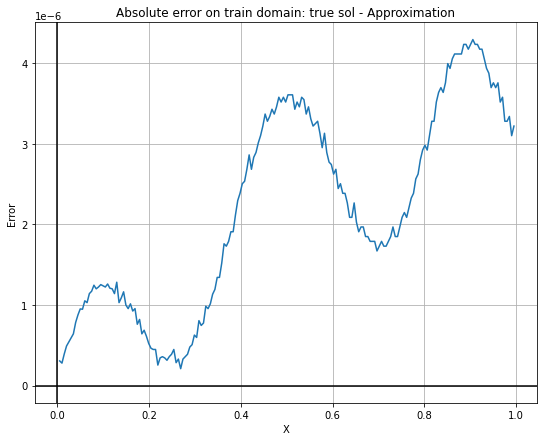

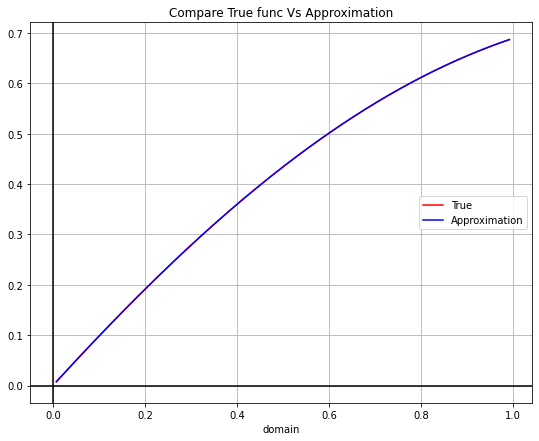

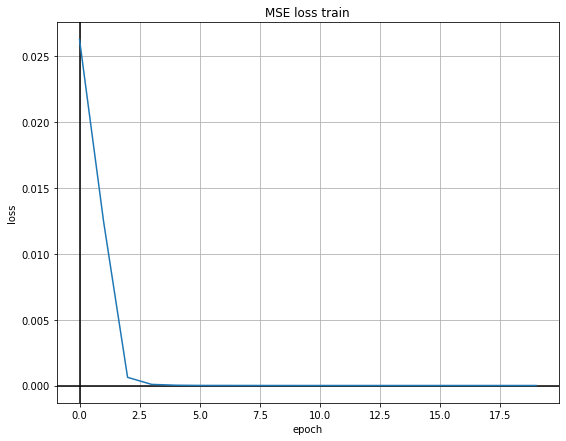

In [10]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №2
$$ u_{tt} + 0.2u_t + u = -0.2 exp(-\frac{t}{5})cos(t) $$
$$ u(0)=0 $$
$$ u'(0)=1 $$
$$ t \in [0,2] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [5]:
left_bound = 0
right_bound = 2
main_eq_residual = (
        lambda x, nn_model_value: nth_derivative(nn_model_value, x, 2)
        + 0.2 * nth_derivative(nn_model_value, x, 1)
        + nn_model_value
        + 0.2 * torch.exp(-x / 5) * torch.cos(x)
    )
n_points = 100
main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - 1
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 1.8775463104248047e-05
Valid max absolute error: 1.8656253814697266e-05
Mean average percentage error on train data: 0.0020898173097521067 %
Mean average percentage error on validation data: 0.002090834779664874 %


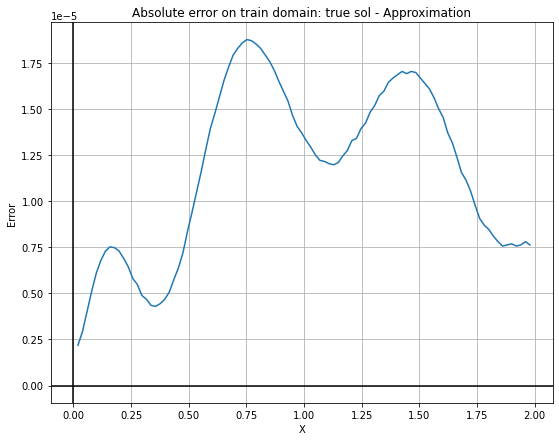

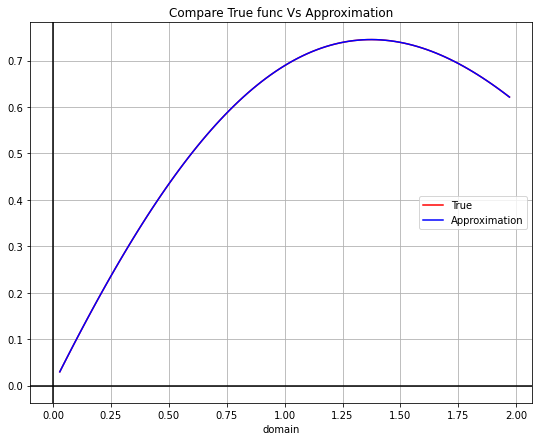

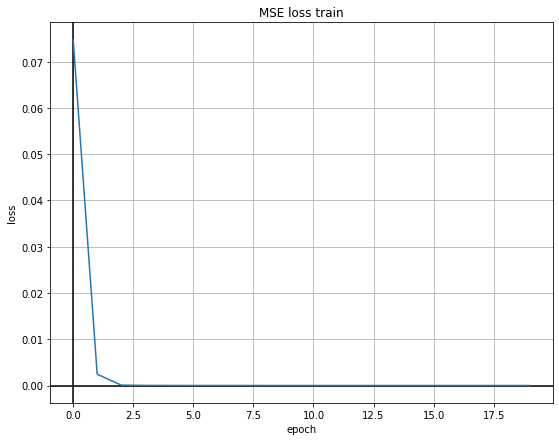

In [6]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

In [7]:
data = torch.linspace(0,10,100)
data = data.view(-1,1)

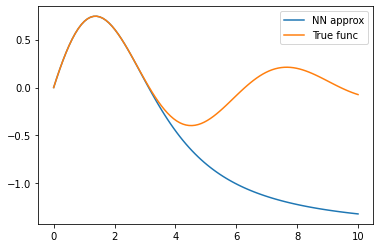

In [8]:
plt.plot(data, nn_model(data).detach().numpy(), label='NN approx')
plt.plot(data, true_solution(data).detach().numpy(), label='True func')
plt.legend()

hmm, apparently neural networks are not good at extrapolation of an unknown function

$$ u_{tt} + 0.2u_t + u = -0.2 exp(-\frac{t}{5})cos(t) $$
$$ u(0)=0 $$
$$ u'(0)=1 $$
$$ t \in [0,10] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

lets try to solve the same problem but with a bigger domain, $t \in [0,10]$

In [9]:
left_bound = 0
right_bound = 10
main_eq_residual = (
        lambda x, nn_model_value: nth_derivative(nn_model_value, x, 2)
        + 0.2 * nth_derivative(nn_model_value, x, 1)
        + nn_model_value
        + 0.2 * torch.exp(-x / 5) * torch.cos(x)
    )
n_points = 100
main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - 1
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 0.09984073042869568
Valid max absolute error: 0.09975269436836243
Mean average percentage error on train data: 13.042486190795898 %
Mean average percentage error on validation data: 12.90238094329834 %


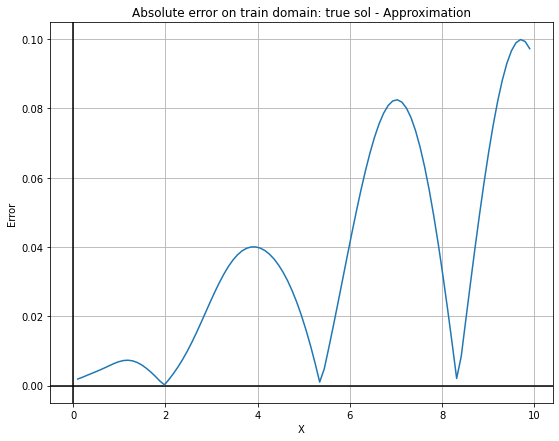

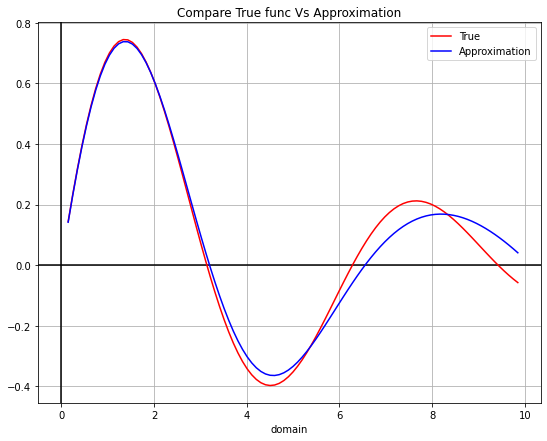

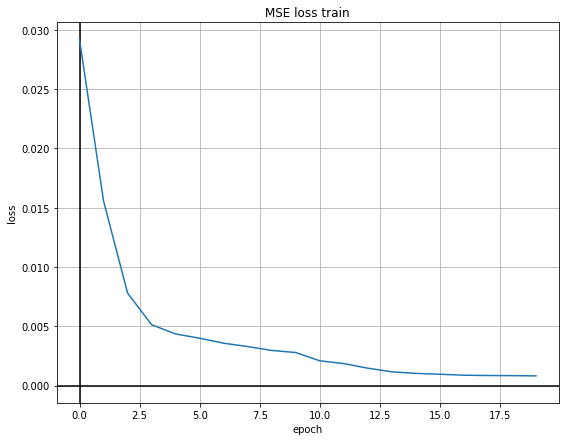

In [10]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

as you can see if domain is big then NN cannot approximate unknown function on a big domain properly

# Example №3
$$ u' + 0.2u = exp(- \frac{t}{5})cos(t) $$
$$ u(0) = 0 $$
$$ t \in [10,11] $$ 
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [11]:
left_bound = 10
right_bound = 12
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 1)
    + 0.2 * function
    -  torch.exp(-variable / 5) * torch.cos(variable)
)
n_points = 200
main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(0, first_init_cond_res)

boundary_conditions = [first_init_cond]

true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 3.003459930419922
Valid max absolute error: 3.0005035400390625
Mean average percentage error on train data: 2639.635009765625 %
Mean average percentage error on validation data: 2634.93505859375 %


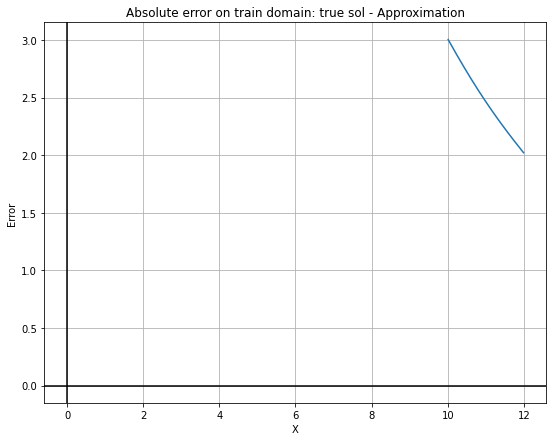

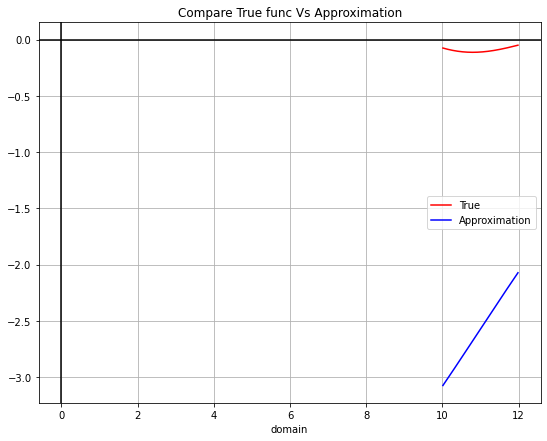

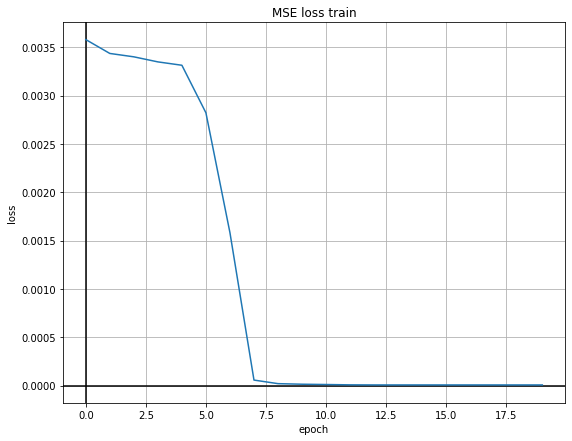

In [12]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

despite MSE's convergence to zero we see that function did not converge

# Example №4
$$ u''+4u=cos(2t) $$
$$ u(0)=1 $$
$$ u'(0)=-1 $$
$$ t \in [0,2] $$ 
$$ true\_solution = \frac{1}{4}*t * sin(2*t) + cos(2*t) - \frac{1}{2}sin(2*t) $$

In [13]:
left_bound = 0
right_bound = 2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + torch.tensor([4.0],requires_grad=True) * function
    - torch.cos(torch.tensor([2.0],requires_grad=True)*variable)
)
n_points = 100
main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) + torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]
true_solution = lambda x: 1/4 * x * torch.sin(2*x) + torch.cos(2*x) - 1/2 * torch.sin(2*x)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 4.476308822631836e-05
Valid max absolute error: 4.45246696472168e-05
Mean average percentage error on train data: 0.0029297375585883856 %
Mean average percentage error on validation data: 0.0029245992191135883 %


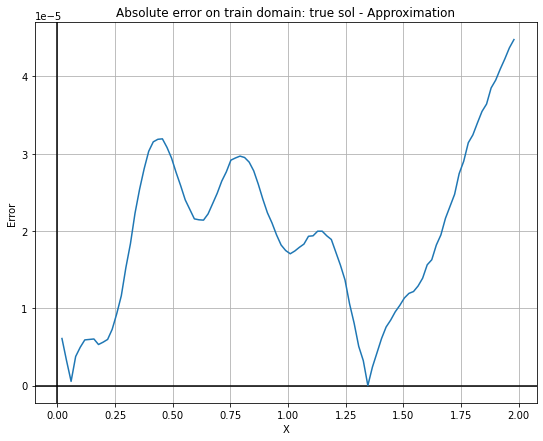

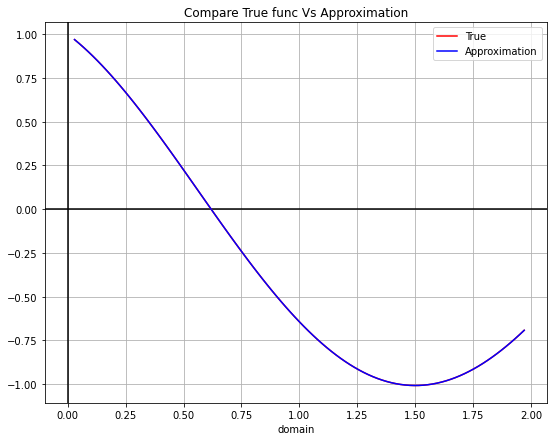

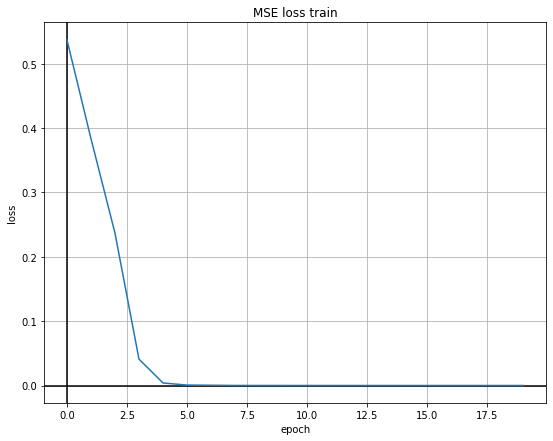

In [14]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

$$ u''+4u=cos(2t) $$
$$ u(0)=1 $$
$$ u'(0)=-1 $$
$$ t \in [0,10] $$ 
$$ true\_solution = \frac{1}{4}*t * sin(2*t) + cos(2*t) - \frac{1}{2}sin(2*t) $$

Again, if we expand domain we will see that there is no convergence

In [15]:
left_bound = 0
right_bound = 10
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + torch.tensor([4.0],requires_grad=True) * function
    - torch.cos(torch.tensor([2.0],requires_grad=True)*variable)
)
n_points = 100
main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) + torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]
true_solution = lambda x: 1/4 * x * torch.sin(2*x) + torch.cos(2*x) - 1/2 * torch.sin(2*x)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 2.0391347408294678
Valid max absolute error: 1.9902656078338623
Mean average percentage error on train data: 87.8501205444336 %
Mean average percentage error on validation data: 88.28932189941406 %


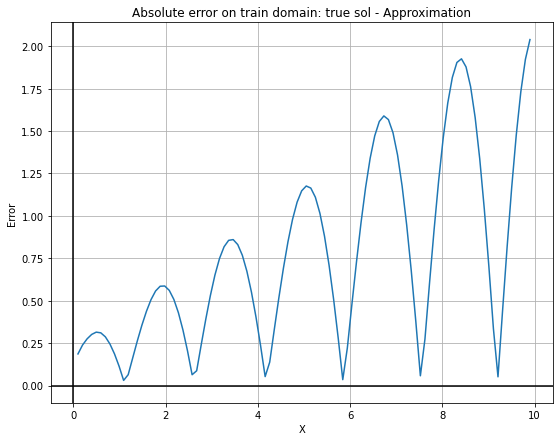

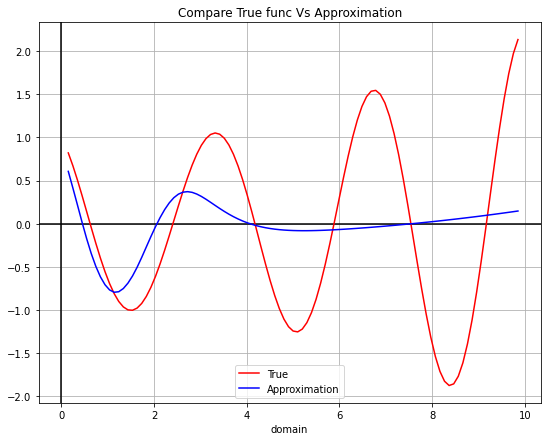

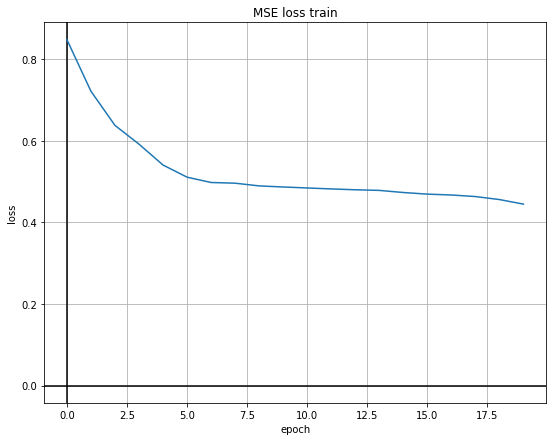

In [16]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №5 No convergence
$$ u''' - 3u'' + 3u' -u = exp(t) $$
$$ u(0)=1 $$
$$ u'(0)=-1 $$
$$ u''(0)=1 $$
$$ t \in [0,1] $$ 
$$ true\_solution = \frac{1}{6} * exp(t) * (t^3 + 12*t^2-12*t+6) $$

In [35]:
left_bound = 0
right_bound = 2
main_eq_residual = (
    lambda variable, function,: 
      nth_derivative(function, variable, 3)
    - torch.tensor([3.0]) * nth_derivative(function, variable, 2)
    + torch.tensor([3.0]) * nth_derivative(function, variable, 1)
    - function
    - torch.exp(variable)
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) + torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,2) - torch.tensor([1.0],requires_grad=True)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

true_solution = lambda x: torch.exp(x) * 1/6 * (x*x*x + 12*x*x- 12*x + 6)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 43.030418395996094
Valid max absolute error: 38.98273849487305
Mean average percentage error on train data: 121.89405059814453 %
Mean average percentage error on validation data: 123.3307113647461 %


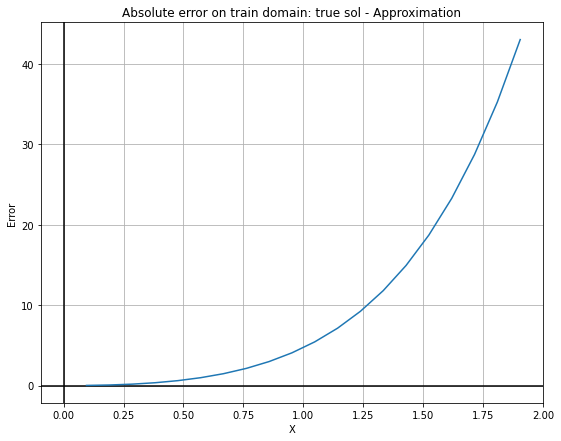

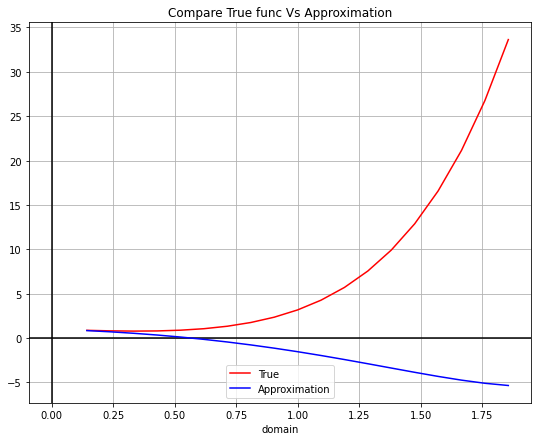

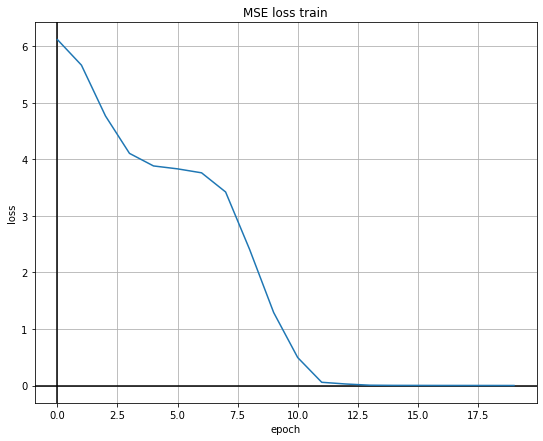

In [36]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №6
$$ u'' + u = -t $$
$$ u(0)=0 $$
$$ t \in [0,1] $$
$$ true\_solution = \frac{sin(x)}{sin(1)} - t $$

In [19]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + function
    + variable
)
n_points = 100
main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([0.0], requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.sin(x)/torch.sin(torch.Tensor([1])) - x
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 5.319714546203613e-06
Valid max absolute error: 5.349516868591309e-06
Mean average percentage error on train data: 0.006171689368784428 %
Mean average percentage error on validation data: 0.006116448435932398 %


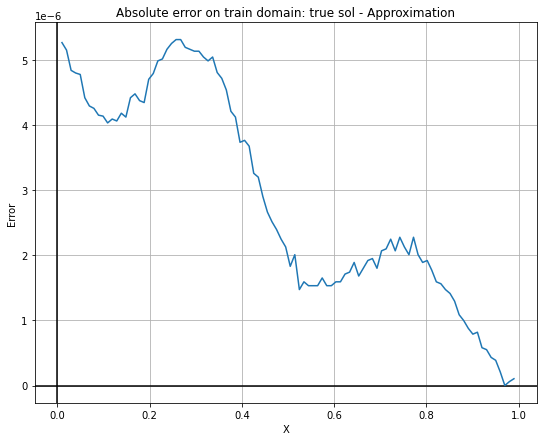

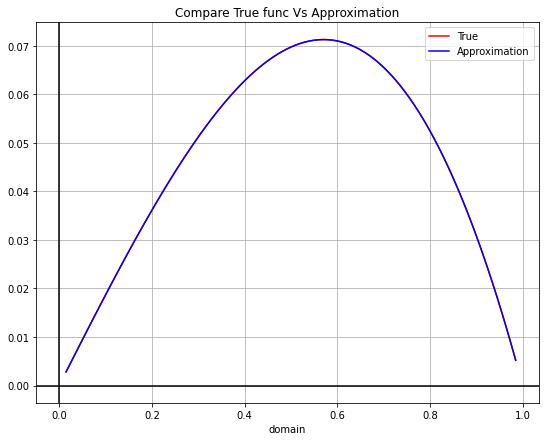

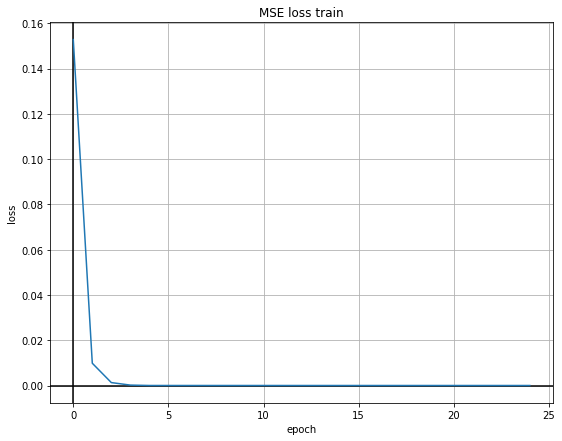

In [20]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №6
$$ u'' + u = 1 $$
$$ u'(0)=0 $$
$$ u(\frac{\pi}{2})-u'(\frac{\pi}{2})= 2 $$
$$ t \in [0,1] $$
$$ true\_solution = 1 + cos(t) $$

In [21]:
left_bound = 0
right_bound = pi/2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + function
    - 1
)
n_points = 100
main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nn_model_value - nth_derivative(nn_model_value,x,1) - 2
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.Tensor([1]) + torch.cos(x)
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 3.0279159545898438e-05
Valid max absolute error: 3.039836883544922e-05
Mean average percentage error on train data: 0.0010924788657575846 %
Mean average percentage error on validation data: 0.0010929192649200559 %


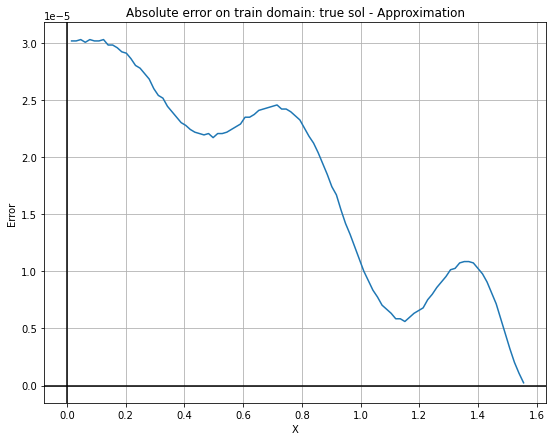

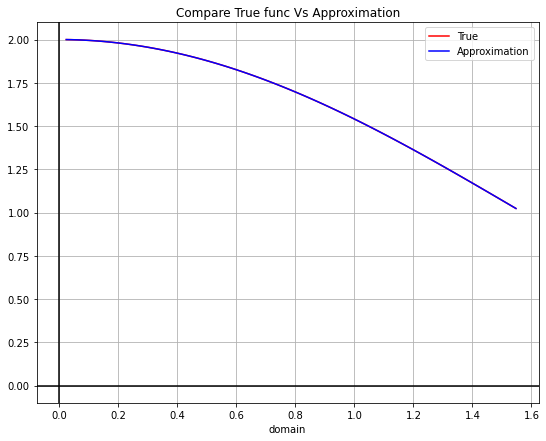

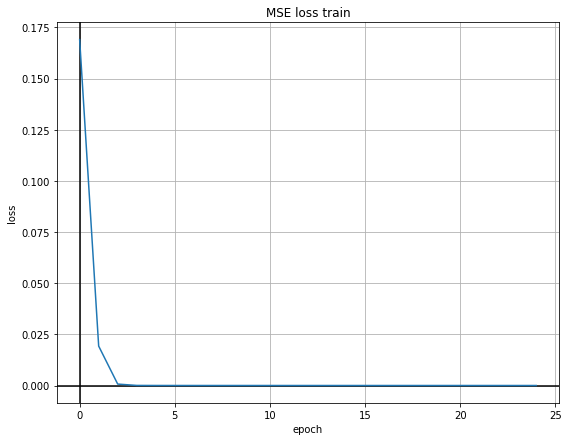

In [22]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №7
$$ u'' - u = 4exp(t) $$
$$ u(0)=0 $$
$$ u'(o)=1 $$
$$ t \in [0,1] $$ 
$$ true\_solution = 2t*exp(t) - sinh(t) $$

In [23]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    - function
    - torch.tensor([4.0],requires_grad=True) * torch.exp(variable)
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: 2 * x * torch.exp(x) - torch.sinh(x)
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 0.00017714500427246094
Valid max absolute error: 0.00016951560974121094
Mean average percentage error on train data: 0.005979773588478565 %
Mean average percentage error on validation data: 0.0060806977562606335 %


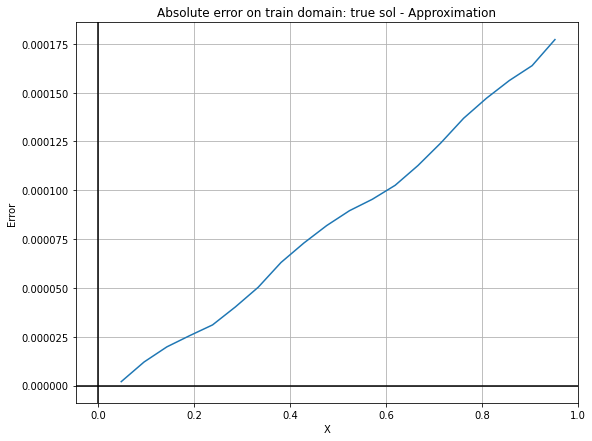

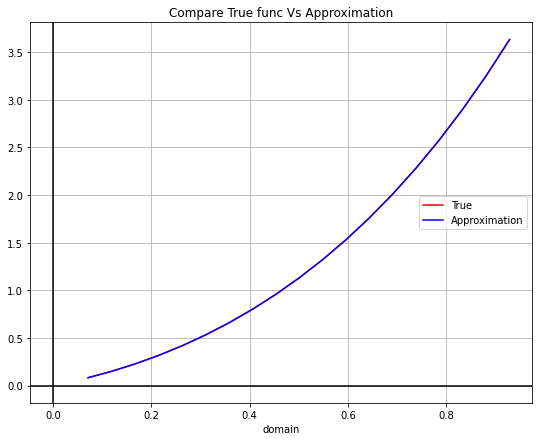

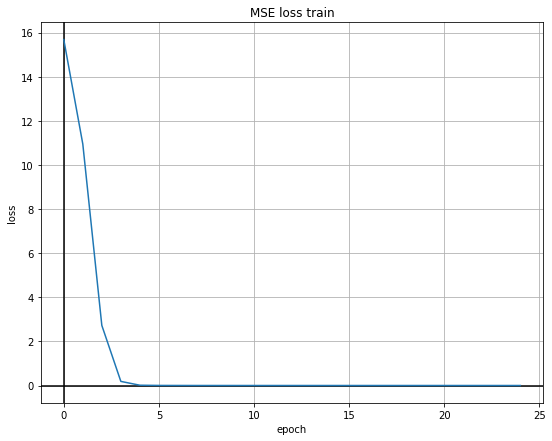

In [24]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №8
$$ (1+t^2)u''-2tu = 0 $$
$$ u(0)=0 $$
$$ u'(0)=3 $$
$$ t \in [0,1] $$
$$ true\_solution = t^3 + 3*t $$

In [25]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: (torch.tensor([1.0],requires_grad=True) + variable*variable)
    * nth_derivative(function, variable, 2)
    - 2 * variable * function
)
n_points = 100
main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - torch.tensor([3.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: (3*x + pow(x,4)/2 - pow(x,6)/5 + pow(x,7)/42 + 
                           3*pow(x,8)/28 - 7*pow(x,9)/360 - 25*pow(x,10)/378)
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 0.031058788299560547
Valid max absolute error: 0.02940225601196289
Mean average percentage error on train data: 0.17474623024463654 %
Mean average percentage error on validation data: 0.16639560461044312 %


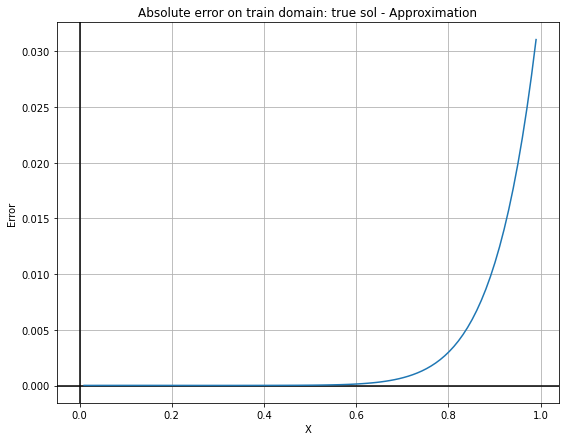

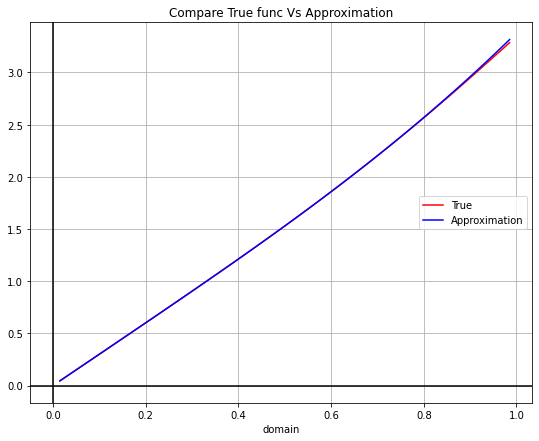

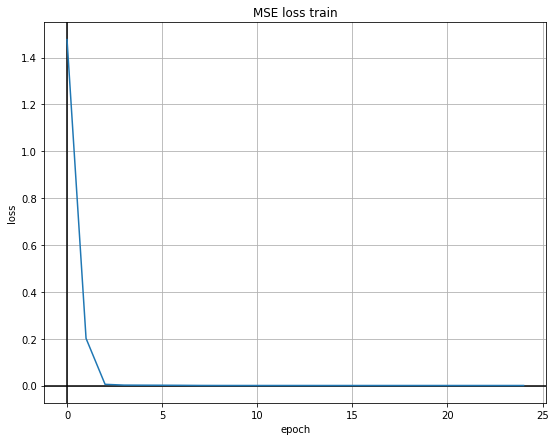

In [26]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №9
$$ u'''+ u'' = \frac{t-1}{t^2} $$
$$ u(1) = \frac{1+e}{e} $$
$$ u'(1) = -\frac{1+e}{e} $$
$$ u''(1) = \frac{1-e}{e} $$
$$ t \in [1,2] $$
$$ true\_sol =  -4t + tln(t) + 7 - 2exp(1-t) + exp(-t) $$

In [27]:
left_bound = 1
right_bound = 2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 3)
    + nth_derivative(function, variable, 2)
    - (variable-1)/(variable**2)
)
n_points = 100
main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - (1+e)/e
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) + torch.tensor([(1+e)/e],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,2) - torch.tensor([(1-e)/e],requires_grad=True)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

true_solution = lambda x: -x*4 + x * torch.log(x) + 7 - 2 * torch.exp(1-x) + torch.exp(-x)
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 1.1220574378967285e-05
Valid max absolute error: 1.1324882507324219e-05
Mean average percentage error on train data: 0.0007440206245519221 %
Mean average percentage error on validation data: 0.0007438633474521339 %


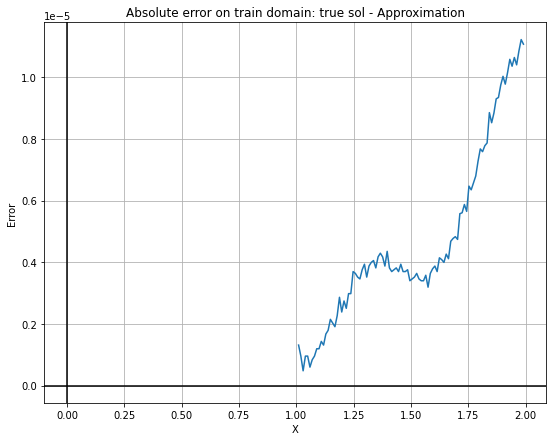

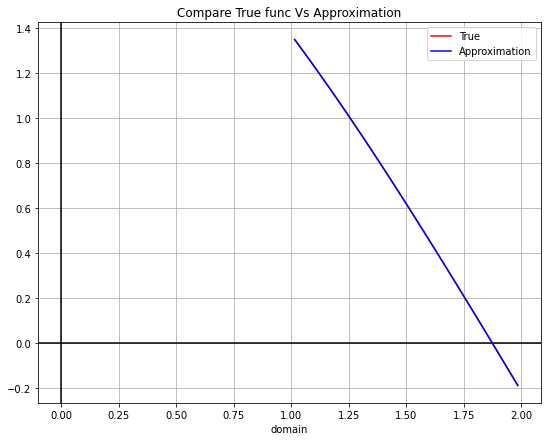

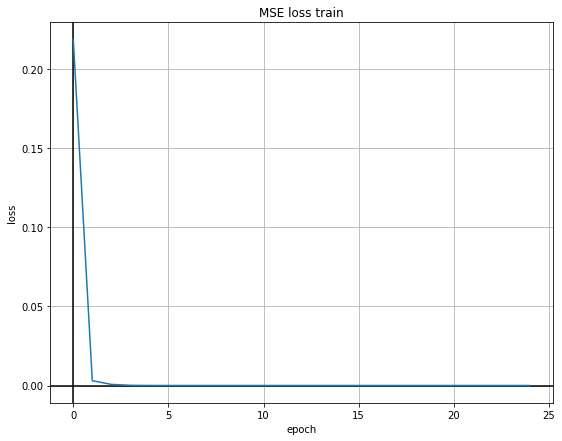

In [28]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №10
$$ u''''+ u'' = \frac{1 + sin^2(t)}{cos^3(t)} $$
$$ u(0) = 1 $$
$$ u'(0) = 0  $$
$$ u''(0) = 0 $$
$$ u'''(0) = 0 $$
$$ t \in [0, 1] $$ 
$$ true\_sol =  (1 + ln(cos(t)))*cos(t) + t * sin(t) $$

In [37]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 4)
    + nth_derivative(function, variable, 2)
    - (torch.tensor([1.0],requires_grad=True) + torch.sin(variable)*torch.sin(variable))
    /(torch.cos(variable)*torch.cos(variable)*torch.cos(variable))
)
n_points = 100
main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,2)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

fourth_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,3)
fourth_init_cond = OnePointInitialCondition(left_bound, fourth_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond, fourth_init_cond]

true_solution = lambda x: ((torch.tensor([1.0],requires_grad=True) + torch.log(torch.cos(x))) 
                           * torch.cos(x) + x * torch.sin(x))
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 0.00019949674606323242
Valid max absolute error: 0.0001989603042602539
Mean average percentage error on train data: 0.01759699359536171 %
Mean average percentage error on validation data: 0.01757858507335186 %


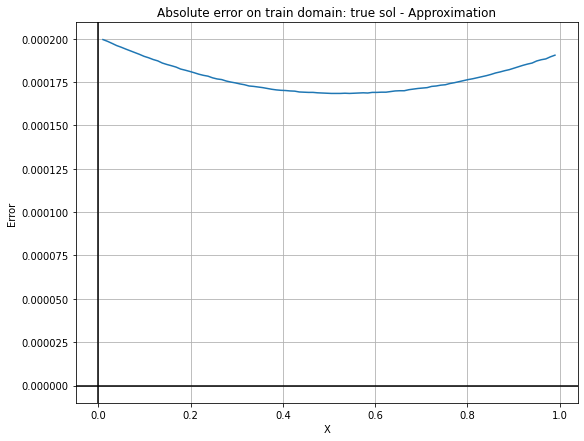

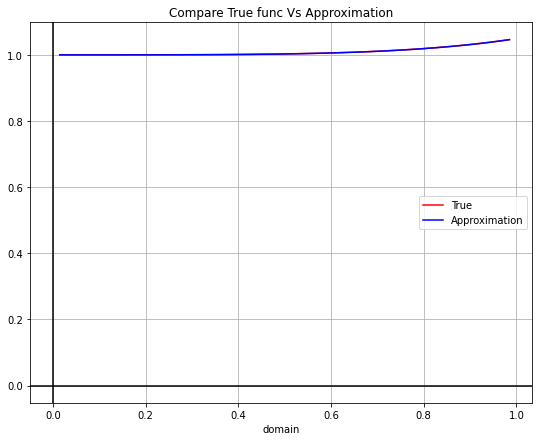

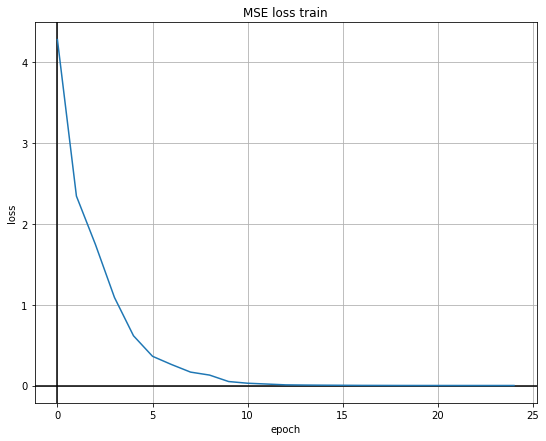

In [38]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №11
$$ u'''+ u' = t*sin(t) + 3*cos(t) $$
$$ u(0) = 1 $$
$$ u'(0) = 2  $$
$$ u''(0) = 0 $$
$$ t \in [0, 1] $$
$$ true\_sol =  1/4 * (-(t^2 - 17) * sin(t) - 9 * t * cos(t) + 4) $$

In [31]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 3)
    + nth_derivative(function, variable, 1)
    - variable * torch.sin(variable) - 3 * torch.cos(variable)
)
n_points = 100
main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - torch.tensor([2.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,2)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

true_solution = lambda x: 1/4*(-(x**2-17)*torch.sin(x)-9*x*torch.cos(x)+4)
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 2.86102294921875e-06
Valid max absolute error: 3.337860107421875e-06
Mean average percentage error on train data: 7.730703509878367e-05 %
Mean average percentage error on validation data: 7.514753087889403e-05 %


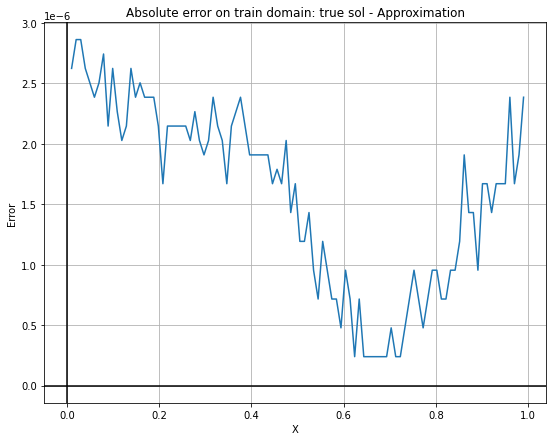

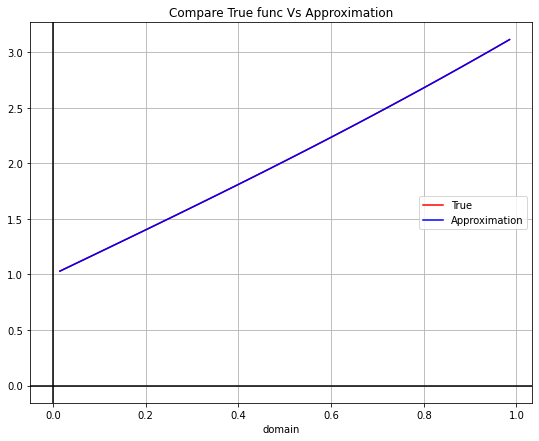

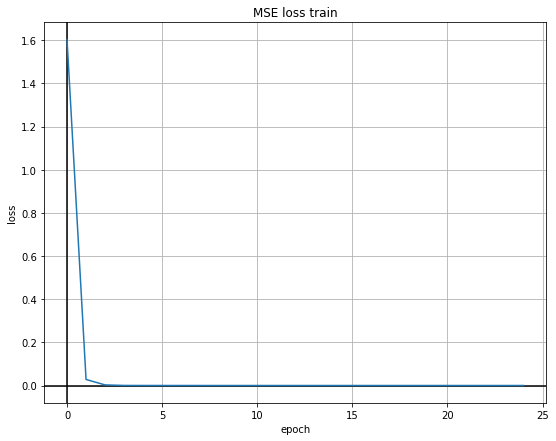

In [32]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()

# Example №12. A physical problem 

A rubber cord with a length of **1** meter is extended by **kf** meters under the action of a force **f** kg. 

By how much will the same cord of length **l** and weight **m** be extended under the action of its own weight, if it is hung at one end?

$$ u'= \frac{km}{l}(l-x) $$
$$ u(0) = 0 $$
$$ x \in [0, l] $$
$$ true\_sol =  \frac{km}{2l}*(l-x)x $$

Lets assume that $l = 3$ meters, $m = 5$ kg, $k = 2\frac{Newton}{meter}$

In [41]:
l = 5
m = 5
k = 2
left_bound = 0
right_bound = l
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 1)
    - k*m/l*(l-variable)
)
n_points = 20
main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)
main_eq = OneDimensionalMainEquation(main_domain, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

boundary_conditions = [first_init_cond]

true_solution = lambda x: k*m/(2*l)*(2*l-x)*x
n_epochs = 25
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 0.050418853759765625
Valid max absolute error: 0.05026054382324219
Mean average percentage error on train data: 0.28325802087783813 %
Mean average percentage error on validation data: 0.2800144553184509 %


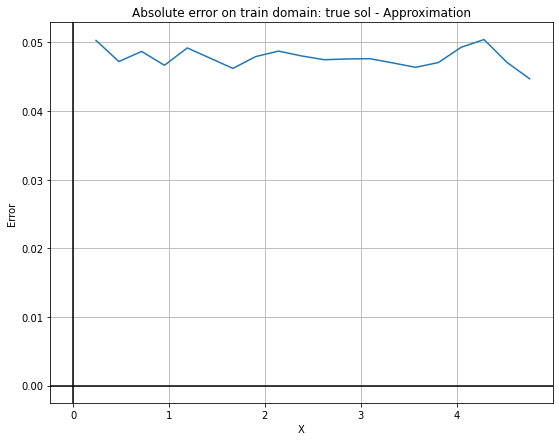

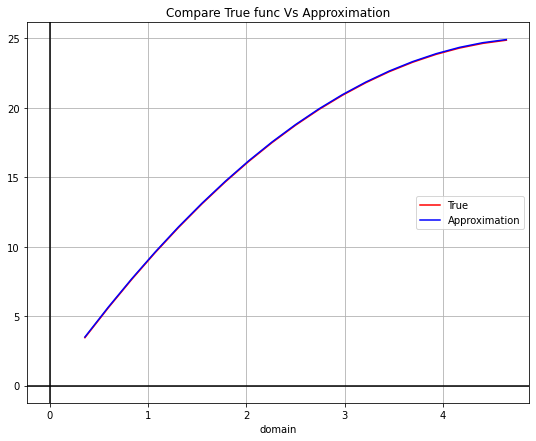

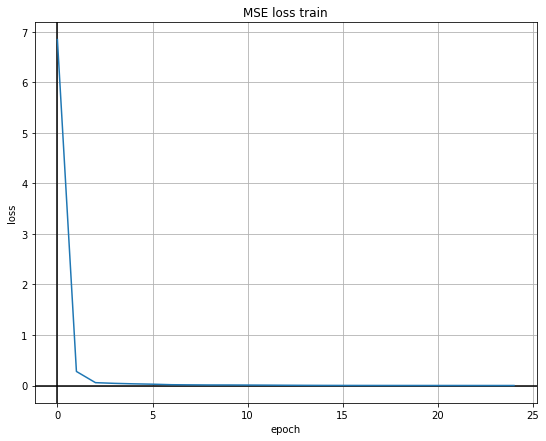

In [42]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs)
report.make_report()